In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\admin\Downloads\HR.csv')
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [5]:
k=df[df.left==1]
k.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [34]:
pd.crosstab(df.salary,df.left)
pd.crosstab(df.last_evaluation,df.left)

left,0,1
last_evaluation,,
0.36,22,0
0.37,55,0
0.38,50,0
0.39,52,0
0.40,57,0
...,...,...
0.96,182,67
0.97,192,84
0.98,199,64


In [39]:
df.groupby(df.left)

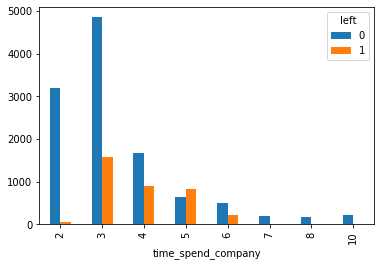

In [36]:
pd.crosstab(df.time_spend_company,df.left).plot(kind='bar')

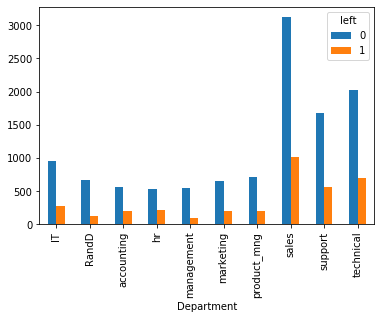

In [38]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

<BarContainer object of 14999 artists>

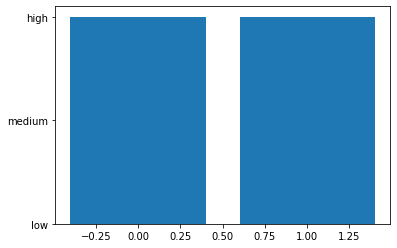

In [17]:
plt.bar(df.left,df.salary)

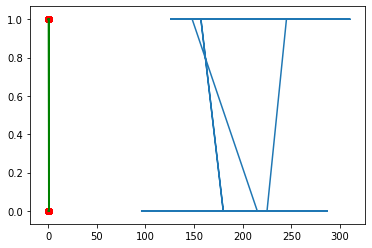

In [80]:
#plt.plot(df.number_project,df.left)
#so there is no relationbetween no. of projects and left
plt.plot(df.satisfaction_level,df.left,c='g')
plt.plot(df.average_montly_hours,df.left)
plt.scatter(df.promotion_last_5years,df.left,c='r')

In [44]:
df1=df.drop(['Department','number_project','last_evaluation','time_spend_company','number_project','Work_accident'],axis=1)
df1.head(3)
#import seaborn as sns
#sns.heatmap(df1.isnull())

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,low
1,0.80,262,1,0,medium
2,0.11,272,1,0,medium


In [47]:
df=pd.get_dummies(df1)
df.head(3)

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,1,0,0,1,0
1,0.80,262,1,0,0,0,1
2,0.11,272,1,0,0,0,1


In [52]:
x=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary_high','salary_low','salary_medium']]
x.values
y=df.left


In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=10)
#len(x_train)

In [86]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [87]:
model.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
model.score(x_test,y_test)

0.778

In [91]:
from sklearn import metrics
rmse=metrics.mean_squared_error(y_test,model.predict(x_test))
rmse

0.222

In [93]:
model.predict_proba(x_test)

array([[0.79576347, 0.20423653],
       [0.60973503, 0.39026497],
       [0.74041548, 0.25958452],
       ...,
       [0.89179119, 0.10820881],
       [0.91190442, 0.08809558],
       [0.87588822, 0.12411178]])